# *Grupo3 SRL*

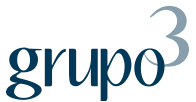

# Final 4º Bimestre Diplomatura UADE 

## Datos del Grupo (Ingrese los datos de los miembros del grupo)

#*Representantes comerciales*

Nombre y Apellido | LU
------------------|---


---


En este notebook se va a mostrar la manera de trabajar las palabras de la columna que posee el texto del mensaje ya preprocesado en una instancia previa.

Los pasos de este proceso son:
- Tokenización del mensaje
    - Implica dividir cada mensaje en palabras individuales o tokens
- Lematización de los tokens
    - Implica unificar aquellas palabras que pertenecen a un mismo paradigma flexivo o derivativo son llevadas a una forma normal que representa a toda la clase
- Unificación de los tokens
- Generación de la nube de palabras

### Indice


1. __<a href='#0' target='_self'>Objetivos del notebook</a>__
1. __<a href='#1' target='_self'>Importamos Librerías</a>__
1. __<a href='#2' target='_self'>Cargamos el DataFrame</a>__
1. __<a href='#3' target='_self'>Generamos las lista de Stopwords</a>__
1. __<a href='#4' target='_self'>Nube de Palabras</a>__

## <a id='0'>Objetivos del notebook</a>

En este notebook se va a mostrar la manera de trabajar las palabras de la columna que posee el texto del mensaje ya preprocesado en una instancia previa.

Los pasos de este proceso son:
- Tokenización del mensaje
    - Implica dividir cada mensaje en palabras individuales o tokens
- Lematización de los tokens
    - Implica unificar aquellas palabras que pertenecen a un mismo paradigma flexivo o derivativo son llevadas a una forma normal que representa a toda la clase
- Unificación de los tokens
- Generación de la nube de palabras

## <a id='1'>1. Importamos las Librerías</a>

In [10]:
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
from PIL import Image
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import unidecode

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import TweetTokenizer
from pandarallel import pandarallel

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime

import spacy
nlp = spacy.load("es_core_news_sm")
import unidecode

---

## <a id='2'>2. Cargamos el DataFrame</a>

In [4]:
wordcloud_df = pd.read_csv('/Users/ri1965/Desktop/UADE/Bimestre_04/Tweeter/Datalake/consume/twitter_wordcloud.csv', index_col=0)

In [5]:
wordcloud_df.head(1)

,fecha,participante,sentimiento,tidiest_tweets
0,"2022/11/28, 21:51:27",walter,pos,que viejo mitÃ³mano asqueroso alfa


Borro las columnas `sentimiento` y  `tokenized` para que las genera la función en el momento.

In [7]:
wordcloud_df = wordcloud_df.drop(["sentimiento"], axis = 1)

In [8]:
wordcloud_df.head(1)

,fecha,participante,tidiest_tweets
0,"2022/11/28, 21:51:27",walter,que viejo mitÃ³mano asqueroso alfa


In [25]:
# wordcloud_df["tidiest_tweets"] = wordcloud_df["tidiest_tweets"].apply(lambda x: unidecode.unidecode(x))

In [14]:
wordcloud_df.head(1)

,fecha,participante,tidiest_tweets
0,"2022/11/28, 21:51:27",walter,que viejo mitÃ³mano asqueroso alfa


## <a id='3'>3. Generamos las lista de Stopwords</a>

In [15]:
STOPWORDS = STOPWORDS.union(set([
    " ", "a", "aaaaa", "actualmente", "adelante", "además", "afirmó", "agregó", "ahí", "ahora",
    "cc", "this", "pa", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l",
    "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "al",
    "algo", "algún", "algún", "alguna", "algunas", "alguno", "algunos",
    "alrededor", "ambos", "ampleamos", "añadió", "ante", "anterior", "antes",
    "apenas", "aproximadamente", "aquel", "aquellas", "aquellos", "aqui",
    "aquí", "arriba", "aseguró", "así", "atras", "aún", "aunque", "ayer",
    "bajo", "bastante", "bien", "buen", "buena", "buenas", "bueno", "buenos",
    "cada", "casi", "cerca", "cierta", "ciertas", "cierto", "ciertos", "cinco",
    "comentó", "como", "cómo", "con", "conocer", "conseguimos", "conseguir",
    "considera", "consideró", "consigo", "consigue", "consiguen", "consigues",
    "contra", "cosas", "creo", "cual", "cuales", "cualquier", "cuando",
    "cuanto", "cuatro", "cuenta", "da", "dado", "dan", "dar", "de", "debe",
    "deben", "debido", "decir", "dejó", "del", "demás", "dentro", "desde",
    "después", "dice", "dicen", "dicho", "dieron", "diferente", "diferentes",
    "dijeron", "dijo", "dio", "donde", "dos", "durante", "e", "ejemplo", "el",
    "de", "la", "el", "porfas", "t", "p", "d", "est",
    "él", "ella", "ellas", "ello", "ellos", "embargo", "empleais", "emplean",
    "emplear", "empleas", "empleo", "en", "encima", "encuentra", "entonces",
    "entre", "era", "eramos", "eran", "eras", "eres", "es", "esa", "esas",
    "ese", "eso", "esos", "esta", "ésta", "está", "estaba", "estaban",
    "estado", "estais", "estamos", "estan", "están", "estar", "estará",
    "estas", "éstas", "este", "éste", "esto", "estos", "éstos", "estoy",
    "estuvo", "ex", "existe", "existen", "explicó", "expresó", "fin", "fue",
    "fuera", "fueron", "fui", "fuimos", "gran", "grandes", "gueno", "ha",
    "haber", "había", "habían", "habrá", "hace", "haceis", "hacemos", "hacen",
    "hacer", "hacerlo", "haces", "hacia", "haciendo", "hago", "han", "hasta",
    "hay", "haya", "he", "hecho", "hemos", "hicieron", "hizo", "hoy", "hubo",
    "igual", "incluso", "indicó", "informó", "intenta", "intentais",
    "intentamos", "intentan", "intentar", "intentas", "intento", "ir", "junto",
    "la", "lado", "largo", "las", "le", "les", "llegó", "lleva", "llevar",
    "lo", "los", "luego", "lugar", "manera", "manifestó", "más", "mayor", "me",
    "mediante", "mejor", "mencionó", "menos", "mi", "mientras", "mio", "misma",
    "mismas", "mismo", "mismos", "modo", "momento", "mucha", "muchas", "mucho",
    "muchos", "muy", "nada", "nadie", "ni", "ningún", "ninguna", "ningunas",
    "ninguno", "ningunos", "no", "nos", "nosotras", "nosotros", "nuestra",
    "nuestras", "nuestro", "nuestros", "nueva", "nuevas", "nuevo", "nuevos",
    "nunca", "o", "ocho", "otra", "otras", "otro", "otros", "para", "parece",
    "parte", "partir", "pasada", "pasado", "pero", "pesar", "poca", "pocas",
    "poco", "pocos", "podeis", "podemos", "poder", "podrá", "podrán", "podria",
    "podría", "podriais", "podriamos", "podrian", "podrían", "podrias",
    "poner", "por", "porque", "por qué", "posible", "primer", "primera",
    "primero", "primeros", "principalmente", "propia", "propias", "propio",
    "propios", "próximo", "próximos", "pudo", "pueda", "puede", "pueden",
    "puedo", "pues", "que", "qué", "quedó", "queremos", "quien", "quién",
    "quienes", "quiere", "realizado", "realizar", "realizó", "respecto",
    "sabe", "sabeis", "sabemos", "saben", "saber", "sabes", "se", "sea",
    "sean", "según", "segunda", "segundo", "seis", "señaló", "ser", "será",
    "serán", "sería", "si", "sí", "sido", "siempre", "siendo", "siete",
    "sigue", "siguiente", "sin", "sino", "sobre", "sois", "sola", "solamente",
    "solas", "solo", "sólo", "solos", "somos", "son", "soy", "su", "sus",
    "tal", "también", "tampoco", "tan", "tanto", "tendrá", "tendrán", "teneis",
    "tenemos", "tener", "tenga", "tengo", "tenía", "tenido", "tercera",
    "tiempo", "tiene", "tienen", "toda", "todas", "todavía", "todo", "todos",
    "total", "trabaja", "trabajais", "trabajamos", "trabajan", "trabajar",
    "trabajas", "trabajo", "tras", "trata", "través", "tres", "tuvo", "tuyo",
    "tu", "te", "pq", "mas", "qie", "us", "has", "ti", "ahi", "mis", "tus",
    "do", "X", "Ven", "mo", "Don", "dia", "PT", "sua", "q", "x", "i", 
    "última", "últimas", "ultimo", "último", "últimos", "un", "una", "unas",
    "uno", "unos", "usa", "usais", "usamos", "usan", "usar", "usas", "uso",
    "usted", "va", "vais", "valor", "vamos", "van", "varias", "varios", "vaya",
    "veces", "ver", "verdad", "verdadera", "verdadero", "vez", "vosotras",
    "n", "s", "of", "c", "the", "m", "qu", "to", "as", "is",
    "asi", "via", "sera", "tambien", "vosotros", "voy", "y", "ya", "yo",
    "havia", "tomado", "guillainbarret", "hombre escrito", "janeiro anv",
    "em", 'representa', 'apresentou', 'jajajaajaj', 'peça', 'fininha',
    'lt3', 'cuándo', 'jajajaja', 'htt', 'deu', 'um', 'mt', 'bom', 'ela',
    'domingoo', 'jajajajaja', 'pl', 'jajajaj', 'favorrrrr', '2002', '3', 'puedesi',
    'sé', 'n', 'setlla', 'bulwer', 'jajaja', 'bahewlett', '投注', '线下', 'yves',
    'na', 'bitcoin', '110', 'billion', 'bitcoins', 'paypal', 'jaajajjajaja', 'hdjsodfj',
    '9009', '2022', '22', 'síndrome', 'janeiro anv']))
stopwords_list = list(STOPWORDS)

In [16]:
NLTK_stop_words_list_es=stopwords.words('spanish')
NLTK_stop_words_list_en=stopwords.words('english')
final_stopword_list = stopwords_list + NLTK_stop_words_list_es + NLTK_stop_words_list_en

## <a id='4'>4. Nube de Palabras</a>

In [22]:
def word_cloud(dataframe, col_tweets, col_participante, participante, lista_stopwords):
    start = datetime.datetime.now()
    """
    dataframe: Es el dataframe que contiene la información
    
    col_tweets: Es la columna que contiene los tweets
    
    col_participante: Es la columna que contiene los nombres de los participantes
    
    participante: Es el nombre del participante (Ej: "walter")
    
    lista_stopwords: Es la lista de stopwords generada previamente
    """
    
    # 1 Genera los tokens solo del sentimiento y participante pasado como argumento
    ####################################################################################################################################
    print("Inicia el paso Tokenización")
    
    tk = TweetTokenizer()
    nlp = spacy.load("es_core_news_sm")
    
    mask_participante = dataframe[col_participante] == participante
    dataframe2 = dataframe[mask_participante]
    dataframe2["tokenized"] = dataframe2["tidiest_tweets"].apply(lambda x: nlp(x))
    print("Termina el paso Tokenización")
    ####################################################################################################################################
    
    # 2 Genera la lemmatizacion de los tokens
    ####################################################################################################################################
    print("Inicia el paso Lematización")    
    
    dataframe2["lemmatized"] = dataframe2["tokenized"].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))
    
    print("Termina el paso Lematización")
    ####################################################################################################################################

    
    # 3 Limpia los tokens y los une en "token_unidos"
    ####################################################################################################################################
    print("Inicia el paso Unión de tokens")
    lista_tokens = ' '.join(dataframe2["lemmatized"].values).split()
    
    tokens_limpios = []
    for token in lista_tokens:
        if token not in lista_stopwords:
            tokens_limpios.append(token)
    
    tokens_unidos = ' '.join([text for text in tokens_limpios])
    print("Termina el paso Unión de tokens")
    ####################################################################################################################################

    
    # 4 Genera la nube de palabras en base al sentimiento pasado como argumento
    ####################################################################################################################################  
    print("Inicia el paso Generación de Nube de Palabras")

    mask_imagen = np.array(Image.open("/Users/ri1965/Desktop/UADE/Bimestre_04/Tweeter/Datalake/imagen_ojo/ojo_sin_lagrima.jpeg"))
    
    wordcloud = WordCloud(mask = mask_imagen,
                          background_color="white",
                          random_state=21, 
                          max_font_size=100, 
                          relative_scaling=0.5,
                          stopwords = lista_stopwords + [participante],
                          width=mask_imagen.shape[1],
                          height=mask_imagen.shape[0],
                          colormap='Dark2').generate(tokens_unidos)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    print("Termina el paso Generación de Nube de Palabras")
    end = datetime.datetime.now()
    delta = round((end - start).seconds / 60, 2)
    print(f"Tiempo que tardó la función: {delta} minutes.")
    plt.show()
    ####################################################################################################################################

Inicia el paso Tokenización
Termina el paso Tokenización
Inicia el paso Lematización
Termina el paso Lematización
Inicia el paso Unión de tokens
Termina el paso Unión de tokens
Inicia el paso Generación de Nube de Palabras
Termina el paso Generación de Nube de Palabras
Tiempo que tardó la función: 0.78 minutes.


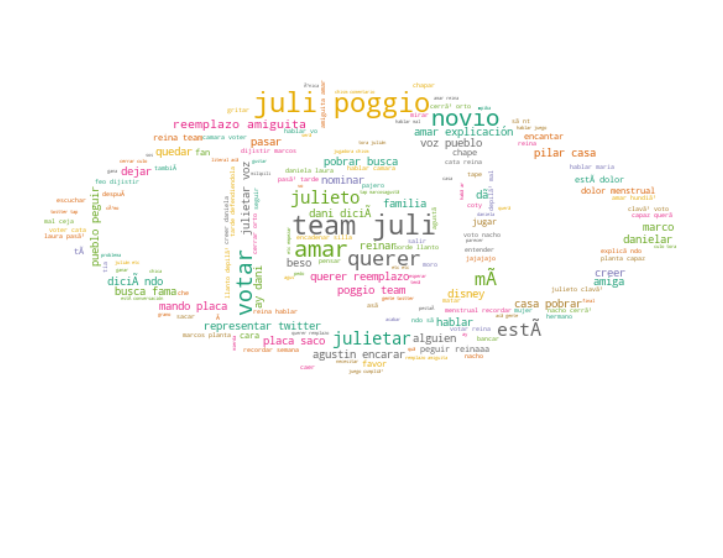

In [24]:
word_cloud(wordcloud_df, "tidiest_tweets", "participante", "julieta", final_stopword_list)

Inicia el paso 1
Termina el paso 1
Inicia el paso 2
Termina el paso 2
Inicia el paso 3
Termina el paso 3
Inicia el paso 4
Termina el paso 4
Tiempo que tardó la función: 1.85 minutes.


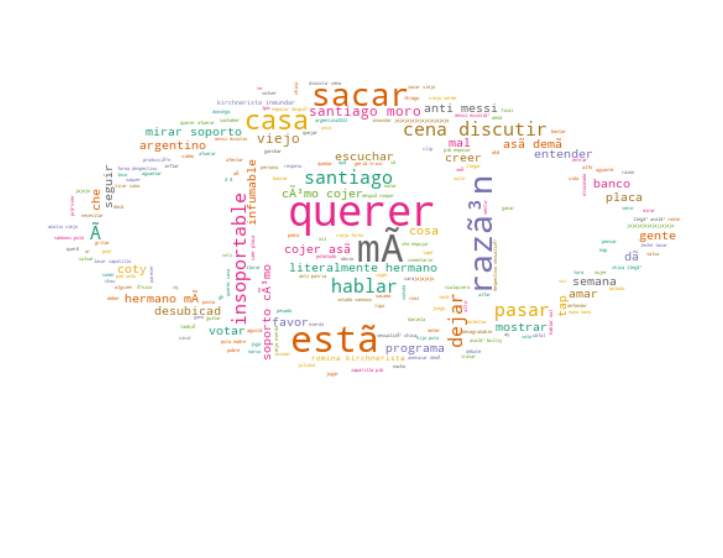

In [21]:
word_cloud(wordcloud_df, "tidiest_tweets", "participante", "walter", final_stopword_list + ["alfa"])

Inicia el paso Tokenización
Termina el paso Tokenización
Inicia el paso Lematización
Termina el paso Lematización
Inicia el paso Unión de tokens
Termina el paso Unión de tokens
Inicia el paso Generación de Nube de Palabras
Termina el paso Generación de Nube de Palabras
Tiempo que tardó la función: 8.15 minutes.


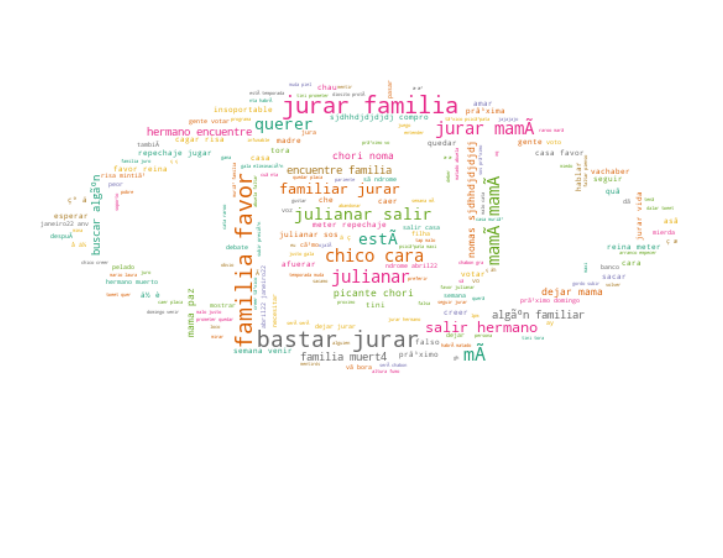

In [26]:
word_cloud(wordcloud_df, "tidiest_tweets", "participante", "juliana", final_stopword_list + ["julián"])

Inicia el paso 1
Termina el paso 1
Inicia el paso 2
Termina el paso 2
Inicia el paso 3
Termina el paso 3
Inicia el paso 4
Termina el paso 4
Tiempo que tardó la función: 1.13 minutes.


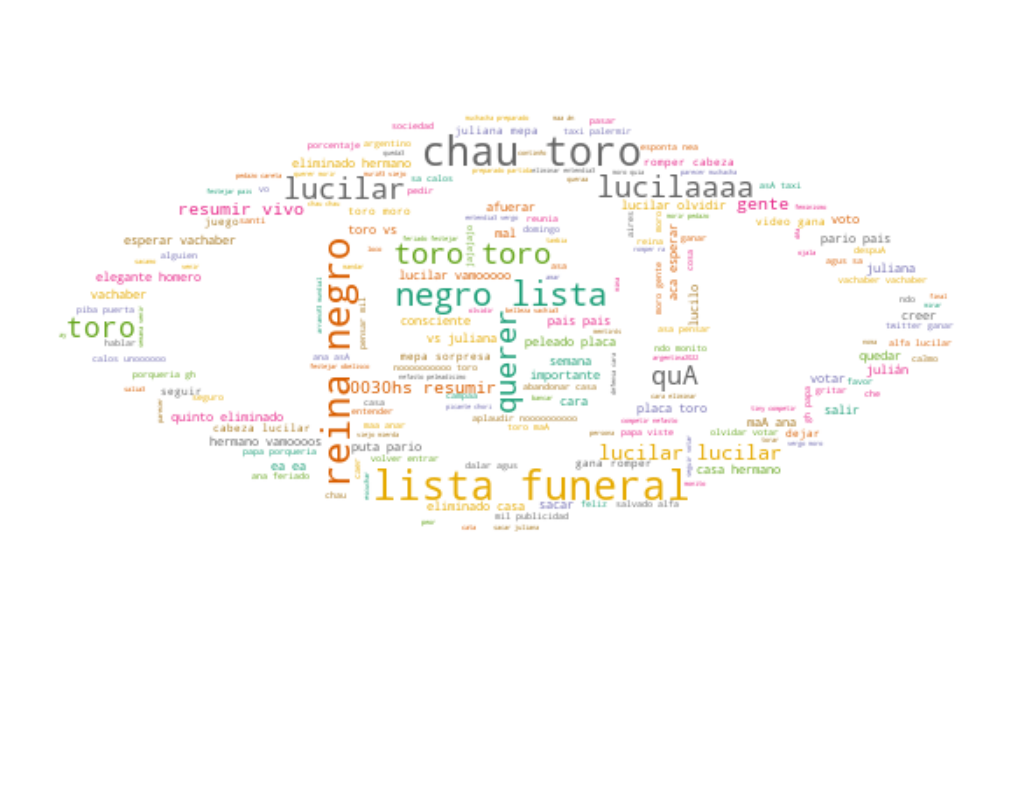

In [36]:
word_cloud(wordcloud_df, "tidiest_tweets", "participante", "lucila", final_stopword_list + ["tora"])

## Aclaración
Este notebook genera las nubes de palabras para eventualmente realizar las visualizaciones en Tableau

En el siguiente notebook se realizará un análisis de las galas `Final_Diplo_v4`